In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [126]:
df = pd.read_csv('/content/test - train.csv', parse_dates = True)

### Descriptive Statistics for the data

In [127]:
df.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 0:00:00,0.0
1,1,0,2016-01-01 0:00:00,0.0
2,2,0,2016-01-01 0:00:00,0.0
3,3,0,2016-01-01 0:00:00,0.0
4,4,0,2016-01-01 0:00:00,0.0


In [128]:
# Checking for any missing values
df.isnull().sum()

building_id      0
meter            0
timestamp        0
meter_reading    0
dtype: int64

In [129]:
# Descriptive analysis
df.describe()

,building_id,meter,meter_reading
count,498513.000000,498513.000000,4.985130e+05
mean,813.646820,0.657554,1.994749e+03
std,426.419227,0.933705,9.220850e+04
min,0.000000,0.000000,0.000000e+00
25%,414.000000,0.000000,1.210720e+01
50%,907.000000,0.000000,6.197520e+01
75%,1197.000000,1.000000,2.160000e+02
max,1448.000000,3.000000,8.243400e+06


### Detecting and Handling Outliers

>  Remove them if outliers are few in number as compared to the data

>  Replace the value if outliers are comparable to the data points



In [130]:

#calculate upper and lower limits
upper_limit = df.meter_reading.mean() + 3 * df.meter_reading.std()
lower_limit = df.meter_reading.mean() -3 * df.meter_reading.std()

#select outliers
outliers = display(df[~((df.meter_reading < upper_limit) & (df.meter_reading > lower_limit))])

# Removing outliers
df = df[(df.meter_reading < upper_limit) & (df.meter_reading > lower_limit)]

,building_id,meter,timestamp,meter_reading
1534,1099,2,2016-01-01 0:00:00,3241630.0
3830,1099,2,2016-01-01 1:00:00,3241630.0
13015,1099,2,2016-01-01 5:00:00,1896620.0
22191,1099,2,2016-01-01 9:00:00,3554740.0
24488,1099,2,2016-01-01 10:00:00,3341210.0
...,...,...,...,...
486303,1099,2,2016-01-09 19:00:00,4072560.0
488606,1099,2,2016-01-09 20:00:00,2875370.0
490908,1099,2,2016-01-09 21:00:00,1755580.0
493210,1099,2,2016-01-09 22:00:00,1434820.0


In [131]:
unique_meter = df['meter'].unique()

In [132]:
# Seperating out the dataframe into multiple dataframe, each for a meter type
df_0 = df[df['meter'] == 0 ]
df_1 = df[df['meter'] == 1 ]
df_2 = df[df['meter'] == 2 ]
df_3 = df[df['meter'] == 3 ]

In [133]:
df_0

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 0:00:00,0.000
1,1,0,2016-01-01 0:00:00,0.000
2,2,0,2016-01-01 0:00:00,0.000
3,3,0,2016-01-01 0:00:00,0.000
4,4,0,2016-01-01 0:00:00,0.000
...,...,...,...,...
498508,1444,0,2016-01-10 0:00:00,6.100
498509,1445,0,2016-01-10 0:00:00,4.700
498510,1446,0,2016-01-10 0:00:00,0.000
498511,1447,0,2016-01-10 0:00:00,167.000


In [134]:
df_0 = df_0[['timestamp','meter_reading']].set_index('timestamp')


df_1 = df_1[['timestamp','meter_reading']].set_index('timestamp')


df_2 = df_2[['timestamp','meter_reading']].set_index('timestamp')


df_3 = df_3[['timestamp','meter_reading']].set_index('timestamp')


In [135]:
pd.to_datetime(df_0.index)

DatetimeIndex(['2016-01-01 00:00:00', '2016-01-01 00:00:00',
               '2016-01-01 00:00:00', '2016-01-01 00:00:00',
               '2016-01-01 00:00:00', '2016-01-01 00:00:00',
               '2016-01-01 00:00:00', '2016-01-01 00:00:00',
               '2016-01-01 00:00:00', '2016-01-01 00:00:00',
               ...
               '2016-01-10 00:00:00', '2016-01-10 00:00:00',
               '2016-01-10 00:00:00', '2016-01-10 00:00:00',
               '2016-01-10 00:00:00', '2016-01-10 00:00:00',
               '2016-01-10 00:00:00', '2016-01-10 00:00:00',
               '2016-01-10 00:00:00', '2016-01-10 00:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=300817, freq=None)

### Plotting data for each meter seperately


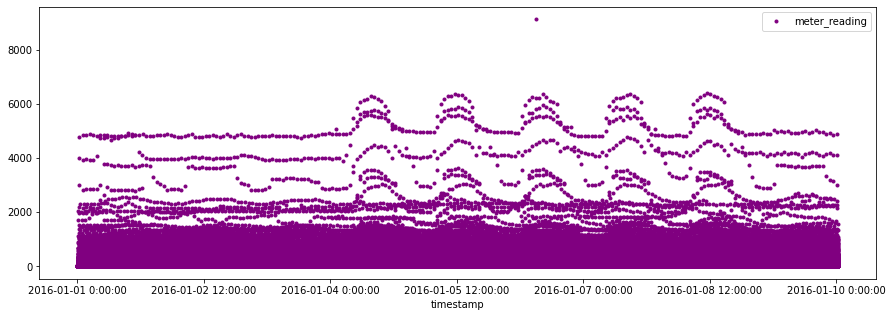

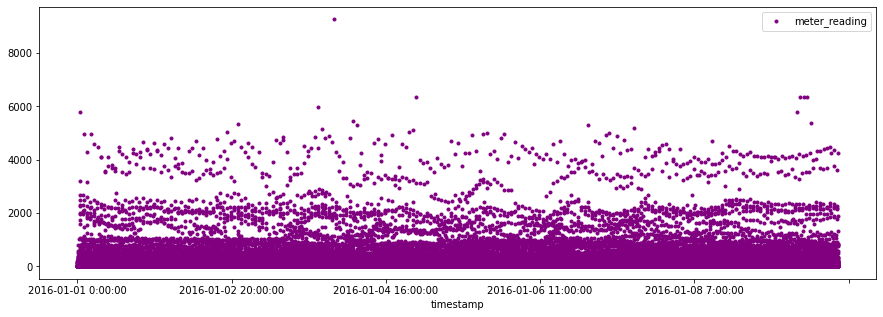

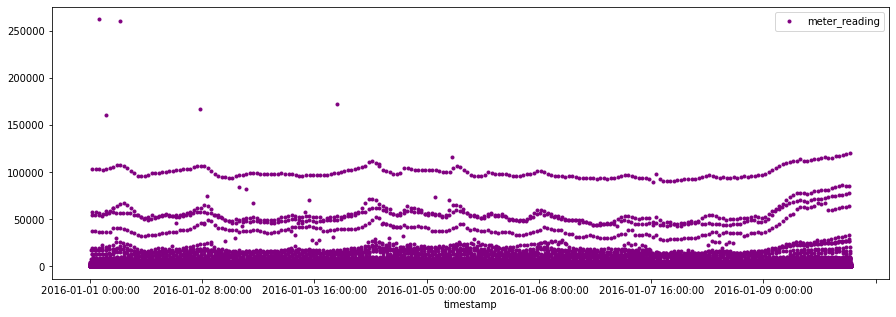

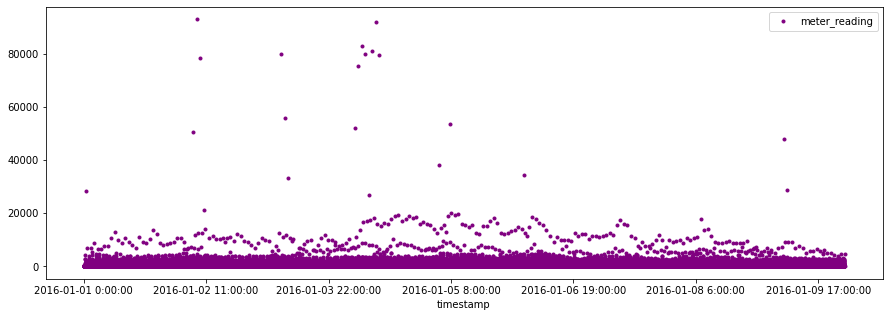

In [136]:
# Plotting different graphs each corresponding to a meter type

df_0.plot(style='.', figsize=(15,5), color='purple')
df_1.plot(style='.', figsize=(15,5), color='purple')
df_2.plot(style='.', figsize=(15,5), color='purple')
df_3.plot(style='.', figsize=(15,5), color='purple')

In [137]:
df.groupby(['building_id','meter']).sum('meter_reading')

,,meter_reading
building_id,meter,
0,0,0.0000
1,0,67.7099
2,0,4.0953
3,0,0.0000
4,0,0.0000
...,...,...
1444,0,1458.8750
1445,0,1242.2500
1446,0,343.9750


In [138]:
# Summing meter reading for each meter
meterwise = df.groupby('meter').sum('meter_reading')['meter_reading']

In [139]:
meterwise.describe()

count    4.000000e+00
mean     6.137873e+07
std      7.386757e+07
min      1.373024e+07
25%      1.726659e+07
50%      3.063365e+07
75%      7.474579e+07
max      1.705174e+08
Name: meter_reading, dtype: float64

In [140]:
# Summing meter reading for each building
buildingwise = df.groupby('building_id').sum('meter_reading')['meter_reading']

In [141]:
buildingwise.describe()

count    1.429000e+03
mean     1.718089e+05
std      8.560381e+05
min      0.000000e+00
25%      3.769890e+03
50%      1.802754e+04
75%      8.554380e+04
max      2.176381e+07
Name: meter_reading, dtype: float64

In [142]:
buildingwise.isnull().sum() #No missing values found

0

In [143]:
meterwise.isnull().sum() #No missing values found

0

### Grouping data into hourly basis for every building and every meter

In [144]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [145]:
# Hourly consumption of energy for each building and each meter

hourly_df = df.groupby(['building_id','meter',df['timestamp'].dt.hour]).sum('meter_reading')['meter_reading']

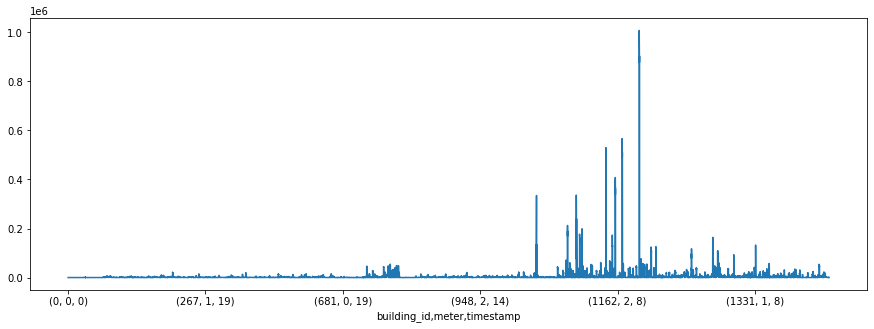

In [146]:
hourly_df.plot(figsize=(15,5))

In [147]:
df_with_zero_reading = df[df['meter_reading'] == 0]

In [148]:
df_with_zero_reading.groupby(['building_id','meter']).sum()

,,meter_reading
building_id,meter,
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
1412,1,0.0
1417,2,0.0
1420,2,0.0


### Computing Skewness


> Transform them if the dataset is skewed using Quantile Transformer



In [149]:
# Computing the skewwness of the dataframe
print(df.skew())

building_id      -0.335048
meter             1.189820
meter_reading    23.719796
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [150]:
from sklearn.preprocessing import QuantileTransformer

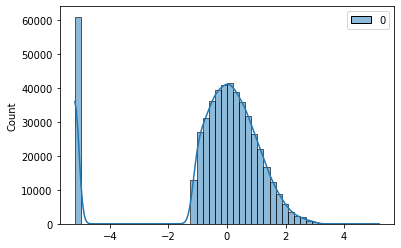

In [151]:
# Handling the skewness

qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
data = np.array(df['meter_reading']).reshape(-1,1)
x = qt.fit_transform(data)
sns.histplot(x, bins = 50, kde = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


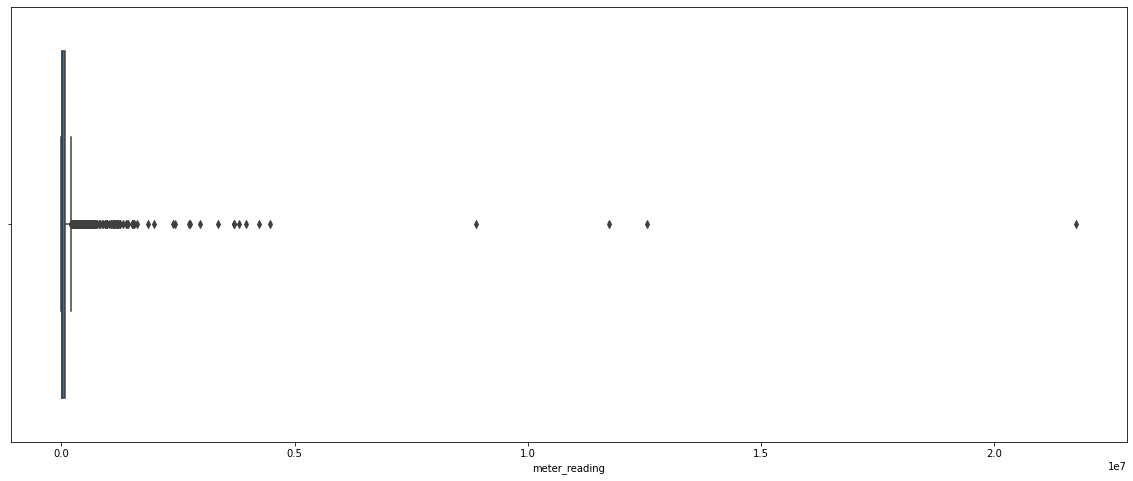

In [152]:
fig = plt.figure(figsize=(20,8))
sns.boxplot(buildingwise)
plt.show()

In [153]:
#calculate upper and lower limits

upper_limit = buildingwise.mean() + 3 * buildingwise.std()
lower_limit = buildingwise.mean() -3 * buildingwise.std()

#select outliers
outliers = display(buildingwise[~((buildingwise < upper_limit) & (buildingwise > lower_limit))])

# Removing outliers
buildingwise = buildingwise[(buildingwise < upper_limit) & (buildingwise > lower_limit)]

building_id
1088    4.483352e+06
1099    2.976039e+06
1104    3.812263e+06
1107    4.247803e+06
1148    1.174741e+07
1156    3.700048e+06
1159    8.891440e+06
1168    1.256512e+07
1197    2.176381e+07
1214    2.747347e+06
1258    3.697755e+06
1284    3.960469e+06
1289    3.351207e+06
1331    2.764681e+06
Name: meter_reading, dtype: float64

In [154]:
buildingwise

building_id
0           0.0000
1          67.7099
2           4.0953
3           0.0000
4           0.0000
           ...    
1444     1458.8750
1445     1242.2500
1446      343.9750
1447    32865.1750
1448      806.2000
Name: meter_reading, Length: 1415, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


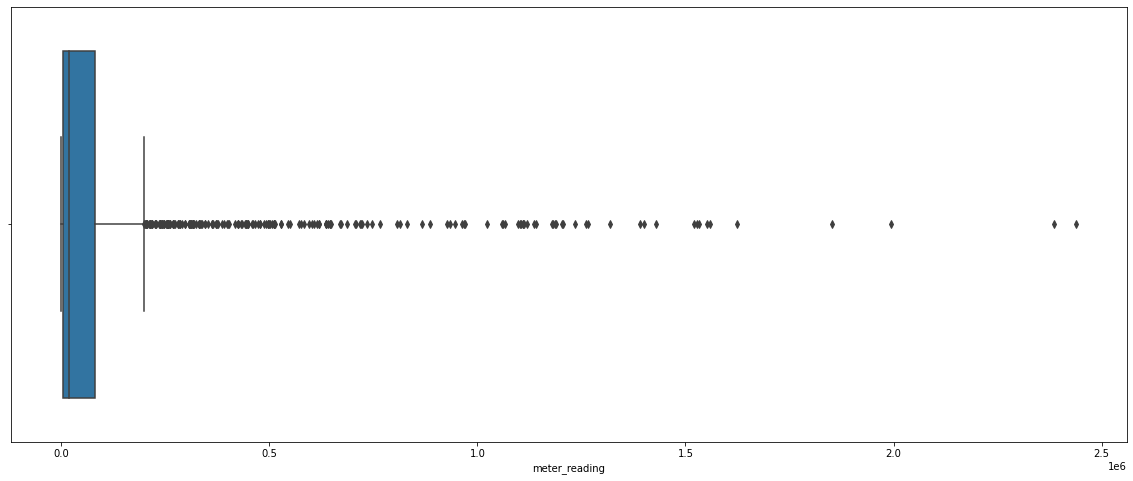

In [155]:
fig = plt.figure(figsize=(20,8))
sns.boxplot(buildingwise)
plt.show()